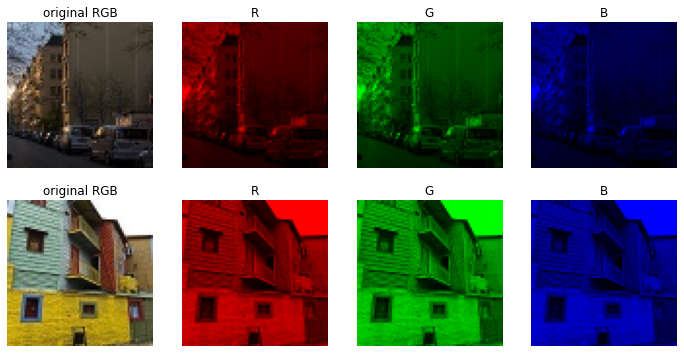

In [28]:
from keras.preprocessing.image import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab
import matplotlib.pyplot as plt
from copy import copy
import numpy as np
import matplotlib.pyplot as plt

sample_img = [r"C:\Users\voolo\Image_colorization_autoencoder\train\color\0.jpg",
            r"C:\Users\voolo\Image_colorization_autoencoder\train\color\1.jpg"]

target_size = (75,75)
# Get images
Ximg = []
for filename in sample_img:
    Ximg.append(load_img(filename,target_size=target_size))

Xsub_rgb = []
for img in Ximg:    
    Xsub_rgb.append(img_to_array(img))   
    
#print(Xsub_rgb[0].shape)
#print(Xsub_rgb[0])

## convert the entire list to numpy array
Xsub_rgb = np.array(Xsub_rgb)

Nsample = Xsub_rgb.shape[0]

count = 1
fig = plt.figure(figsize=(12,3*Nsample))
for rgb in Xsub_rgb:
    ## This section plot the original rgb
    ax = fig.add_subplot(Nsample,4,count)
    ax.imshow(rgb/255.0); ax.axis("off")
    ax.set_title("original RGB")
    count += 1
    
    for i, lab in enumerate(["R","G","B"]):
        crgb = np.zeros(rgb.shape)
        crgb[:,:,i] = rgb[:,:,0]
        ax = fig.add_subplot(Nsample,4,count)
        ax.imshow(crgb/255.0); ax.axis("off")
        ax.set_title(lab)
        count += 1
    
plt.show()

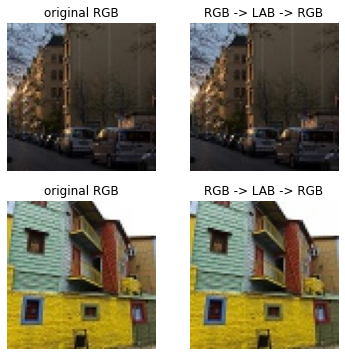

In [33]:
Xsub_rgb01 = Xsub_rgb/255.0
Xsub_lab = rgb2lab(Xsub_rgb01)
sub_lab_rgb = np.zeros( Xsub_lab.shape)
Xsub_lab_rgb = np.zeros( Xsub_lab.shape)

for i in range(Xsub_lab.shape[0]):
    Xsub_lab_rgb[i] = lab2rgb(Xsub_lab[i])

count = 1
fig = plt.figure(figsize=(6,3*Nsample))
for  irgb, irgb2 in zip(Xsub_rgb01, Xsub_lab_rgb):
    ax = fig.add_subplot(Nsample,2,count)
    ax.imshow(irgb); ax.axis("off")
    ax.set_title("original RGB")
    count += 1
    
    ax = fig.add_subplot(Nsample,2,count)
    ax.imshow(irgb2); ax.axis("off")
    ax.set_title("RGB -> LAB -> RGB")
    count += 1
    
plt.show()

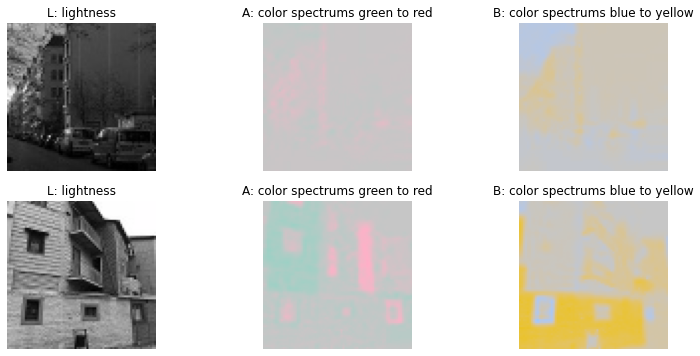

In [34]:
def extract_single_dim_from_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = lab2rgb(z)
    return(z)

count = 1
fig = plt.figure(figsize=(13,3*Nsample))
for lab in Xsub_lab:
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,0) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("L: lightness")
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,1) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("A: color spectrums green to red")
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,2) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("B: color spectrums blue to yellow")
    count += 1
plt.show()